In [1]:
import pandas as pd
data=pd.read_csv('balanced_simulated_data.csv')

### Data Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sensor_temp        1000 non-null   float64
 1   sensor_vib         1000 non-null   float64
 2   sensor_voltage     1000 non-null   float64
 3   operational_hours  1000 non-null   int64  
 4   maintenance        1000 non-null   int64  
 5   RUL                1000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 47.0 KB
None

### Data Description ###
       sensor_temp   sensor_vib  sensor_voltage  operational_hours  \
count  1000.000000  1000.000000     1000.000000        1000.000000   
mean     40.193321     0.514639      220.067304        1509.193000   
std       9.792159     0.198185        4.826838         812.115637   
min       7.587327     0.000000      210.000000         105.000000   
25%      33.524097     0.378752      216.760002         791.7

C:\Users\Rudra\AppData\Local\Temp\ipykernel_24324\2709563970.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='maintenance', data=data, palette='viridis')


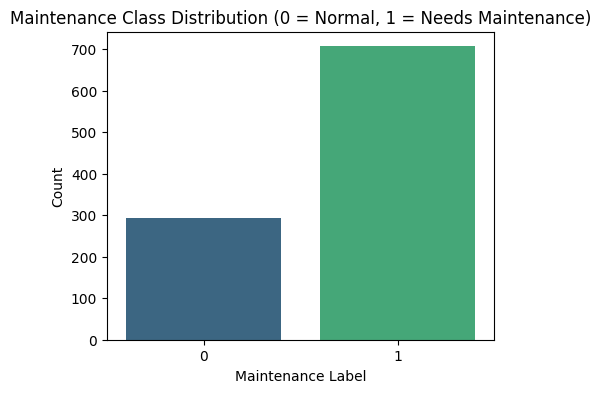

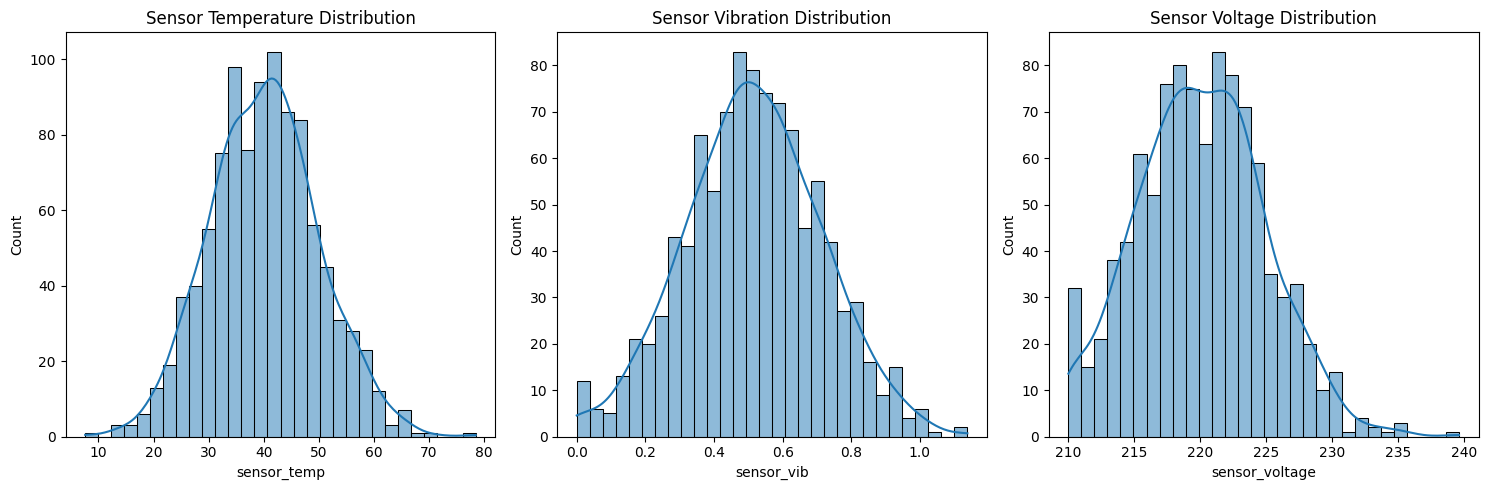

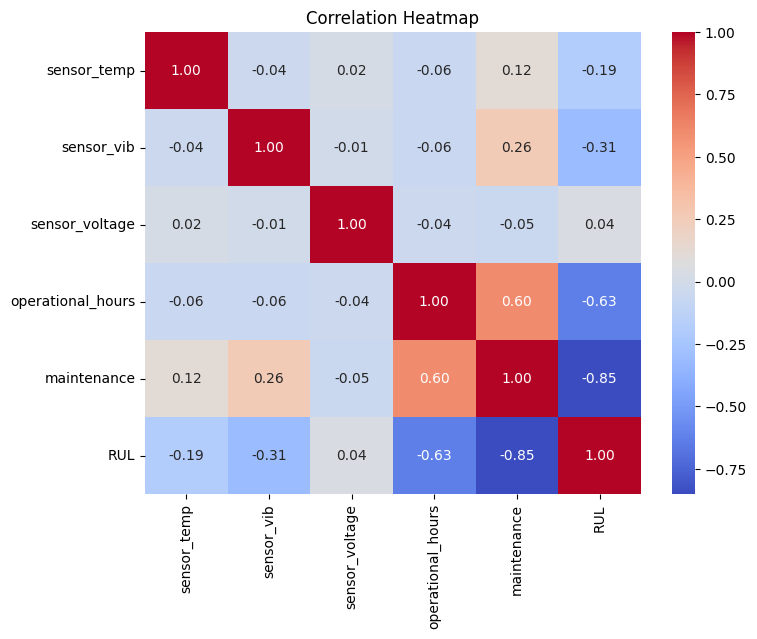

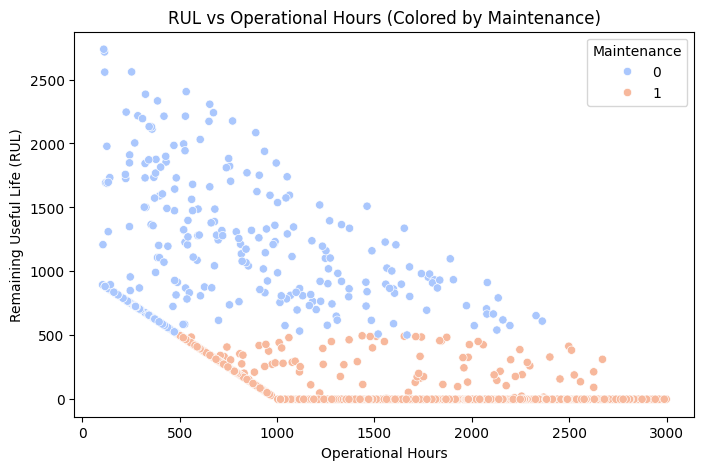

In [2]:

# ===============================
# STEP 2: Exploratory Data Analysis (EDA)
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Information
print("### Data Info ###")
print(data.info())
print("\n### Data Description ###")
print(data.describe())

# 2. Class Balance for Maintenance
plt.figure(figsize=(5, 4))
sns.countplot(x='maintenance', data=data, palette='viridis')
plt.title("Maintenance Class Distribution (0 = Normal, 1 = Needs Maintenance)")
plt.xlabel("Maintenance Label")
plt.ylabel("Count")
plt.show()

# 3. Distribution of Sensor Readings
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data['sensor_temp'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Sensor Temperature Distribution')

sns.histplot(data['sensor_vib'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Sensor Vibration Distribution')

sns.histplot(data['sensor_voltage'], bins=30, kde=True, ax=axs[2])
axs[2].set_title('Sensor Voltage Distribution')

plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 5. RUL vs Operational Hours
plt.figure(figsize=(8, 5))
sns.scatterplot(x='operational_hours', y='RUL', hue='maintenance', data=data, palette='coolwarm')
plt.title("RUL vs Operational Hours (Colored by Maintenance)")
plt.xlabel("Operational Hours")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend(title="Maintenance")
plt.show()


Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.99      0.99      0.99       141

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200



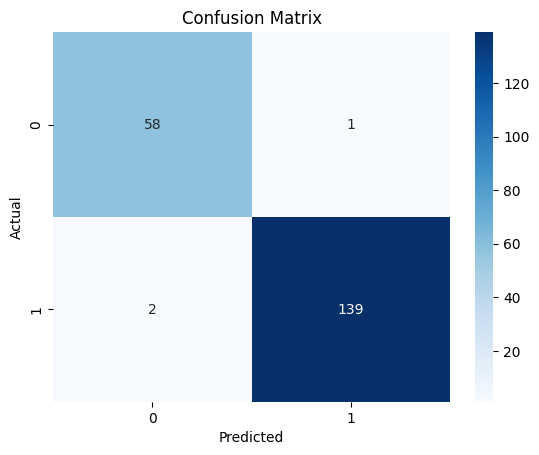

In [3]:

# ===============================
# STEP 3: Classification
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
features = ['sensor_temp', 'sensor_vib', 'sensor_voltage', 'operational_hours']
target_clf = 'maintenance'

# Scale features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target_clf], test_size=0.2, random_state=42, stratify=data[target_clf]
)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Root Mean Squared Error (hours): 109.85
R² Score: 0.96


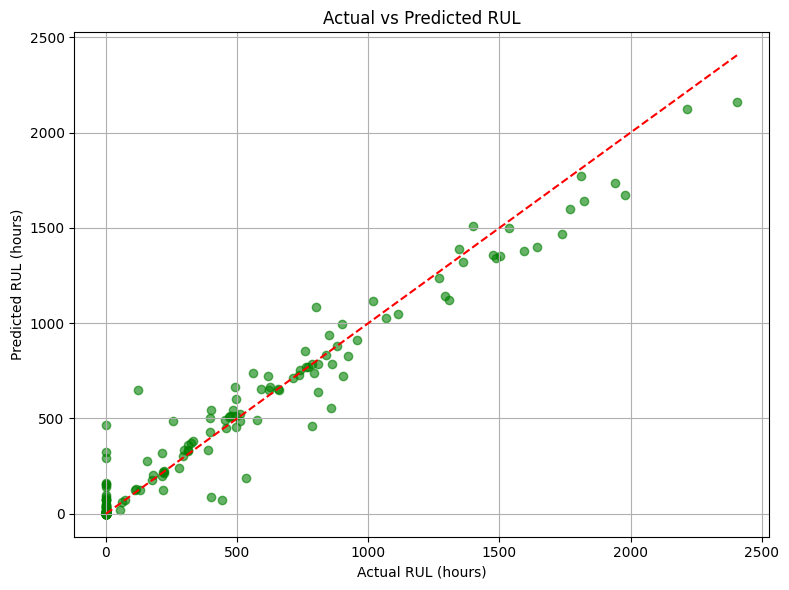

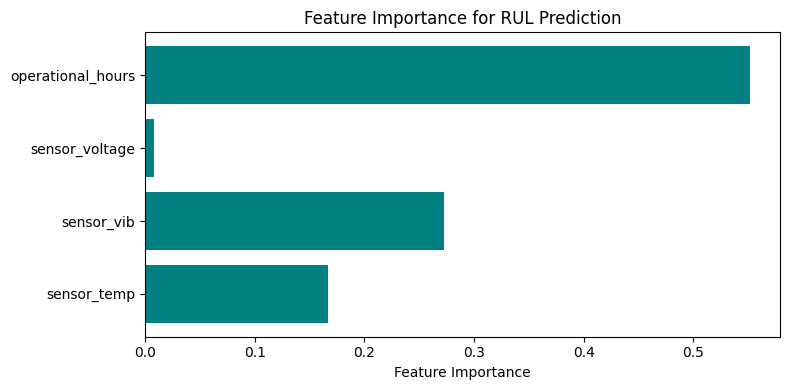

In [4]:

# ===============================
# STEP 4: Regression for RUL
# ===============================
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Target for regression
target_reg = 'RUL'

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    data[features], data[target_reg], test_size=0.2, random_state=42
)

# Train regression model
reg = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_reg = reg.predict(X_test_reg)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Root Mean Squared Error (hours): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='green')
plt.plot([0, max(y_test_reg)], [0, max(y_test_reg)], 'r--')
plt.xlabel("Actual RUL (hours)")
plt.ylabel("Predicted RUL (hours)")
plt.title("Actual vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
importances = reg.feature_importances_
feature_names = X_train_reg.columns

plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color='teal')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for RUL Prediction")
plt.tight_layout()
plt.show()


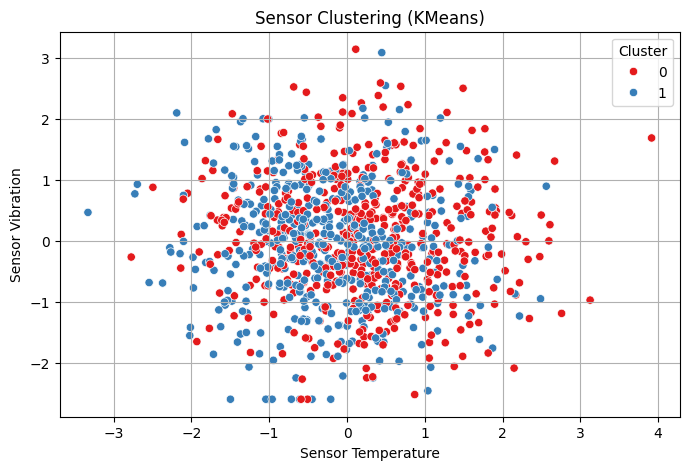

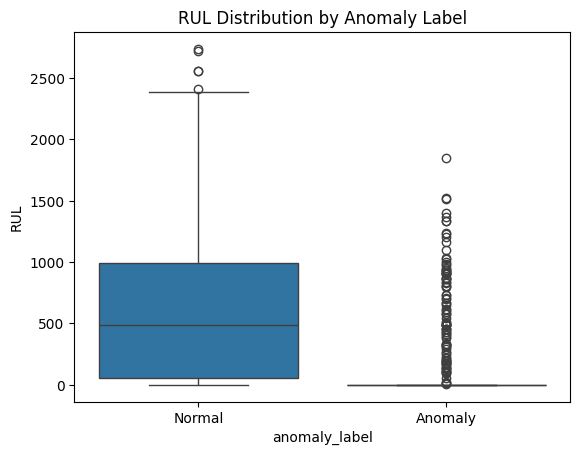

In [5]:

# ===============================
# STEP 5: Clustering for Anomaly Detection
# ===============================

from sklearn.cluster import KMeans

# Fit KMeans (2 clusters: normal vs anomaly)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data[features])

# Add cluster labels to your DataFrame
data['cluster'] = kmeans.labels_

# Step: Identify which cluster is more degraded (i.e., lower RUL)
cluster_rul_mean = data.groupby('cluster')['RUL'].mean()
anomaly_cluster = cluster_rul_mean.idxmin()  # Lower RUL = more likely degraded/anomaly

# Step: Create human-readable labels
data['anomaly_label'] = data['cluster'].apply(
    lambda x: 'Anomaly' if x == anomaly_cluster else 'Normal'
)

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='sensor_temp', y='sensor_vib', hue='cluster', palette='Set1')
plt.title('Sensor Clustering (KMeans)')
plt.xlabel('Sensor Temperature')
plt.ylabel('Sensor Vibration')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# RUL distribution by anomaly label
sns.boxplot(x='anomaly_label', y='RUL', data=data)
plt.title("RUL Distribution by Anomaly Label")
plt.show()


In [6]:
from scipy.spatial.distance import cdist

# Calculate distances to cluster centers
distances = cdist(data[features], kmeans.cluster_centers_)

# Minimum distance to assigned cluster
data['distance_to_center'] = [distances[i, label] for i, label in enumerate(data['cluster'])]

# Define thresholds
rul_threshold = 200  # hours
distance_threshold = data['distance_to_center'].quantile(0.90)  # top 10% farthest points

# Hybrid anomaly detection
data['anomaly_label'] = data.apply(
    lambda row: 'Anomaly' if (row['RUL'] < rul_threshold or row['distance_to_center'] > distance_threshold) else 'Normal',
    axis=1
)


In [7]:
# Unified Prediction Code for Multiple Samples

def predict_maintenance(features):
    # Convert input to DataFrame
    features_df = pd.DataFrame([features], columns=['sensor_temp', 'sensor_vib', 'sensor_voltage', 'operational_hours'])
    
    # Scale input
    features_scaled = scaler.transform(features_df)
    
    # Predictions
    rul_pred = reg.predict(features_scaled)
    maint_pred = clf.predict(features_scaled)
    
    # Cluster and distance
    cluster_pred = kmeans.predict(features_scaled)
    distance = cdist(features_scaled, kmeans.cluster_centers_)[0, cluster_pred[0]]
    
    # Hybrid anomaly detection
    anomaly = 'Anomaly' if (rul_pred[0] < 200 or distance > distance_threshold) else 'Normal'

    return {
        'RUL Prediction (hours)': round(rul_pred[0], 2),
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': anomaly
    }

# ---------------- SAMPLE PREDICTIONS ----------------
sample_features_healthy = [30, 0.4, 220, 500]
prediction_healthy = predict_maintenance(sample_features_healthy)

sample_features_failing = [90, 1.0, 210, 2900]
prediction_failing = predict_maintenance(sample_features_failing)

print("Sample Features (Healthy):", sample_features_healthy)
print("Prediction (Healthy):", prediction_healthy)
print("\nSample Features (Failing):", sample_features_failing)
print("Prediction (Failing):", prediction_failing)


Sample Features (Healthy): [30, 0.4, 220, 500]
Prediction (Healthy): {'RUL Prediction (hours)': np.float64(2107.99), 'Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Normal'}

Sample Features (Failing): [90, 1.0, 210, 2900]
Prediction (Failing): {'RUL Prediction (hours)': np.float64(0.0), 'Maintenance Prediction': 'Needs Maintenance', 'Anomaly Detection': 'Anomaly'}


c:\Users\Rudra\.virtualenvs\Predictive-Maintenance-main-N0f8aXwT\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Rudra\.virtualenvs\Predictive-Maintenance-main-N0f8aXwT\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Rudra\.virtualenvs\Predictive-Maintenance-main-N0f8aXwT\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\Rudra\.virtualenvs\Predictive-Maintenance-main-N0f8aXwT\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Rudra\.virtualenvs\Predictive-Maintenance-mai

In [8]:
import pickle

# Save models and scaler
with open('reg_model.pkl', 'wb') as f:
    pickle.dump(reg, f)

with open('clf_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("All models and scaler have been saved as .pkl files!")


All models and scaler have been saved as .pkl files!
